# Лабораторная работа 6. Машинное  обучение  Scikit-learn

Загрузите дата-сет из файла data.xlsx.


In [1]:
import pandas as pd
df = pd.read_excel('data.xlsx',index_col=0)

Исправьте прочерки в некоторых ячейках. 

In [51]:
import matplotlib.pylab as plt
import pandas as pd
import warnings
Df = pd.read_excel('data.xlsx',index_col=0)
Df = Df.replace('-',0)
feat = ['Количество купленных на матч билетов','Дома или в гостях','Место команды соперника в турнирной таблице выше середины или ниже','Количество проведённых матчей за последнюю неделю','Выиграли или проиграли предыдущую игру','Положительная или отрицательная статистика игр с этой командой','Данную игру выиграли или проиграли','Играл или нет игрок Трус','Коршунов','Бадун','Лисичкин','Боярчук','Жидких','Марковский','Дорофеев','Ментюк','Пасют','Лаакконен','Широков','Марченко','Ремезов','А.Малявко','С.Малявко','Дадонов','Степанов','Шевченко','Казнадей','Осипов','Саманьков','Грецкий','Кислый','Горбаченко','Безайс','Брикун','Стефанович',]
x_test = df.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
Df.columns = feat
Df = Df[:-1]
Df.head()

Количество купленных на матч билетов  Дома или в гостях  \
Матч                                                            
1                                     1130                  0   
2                                      700                  0   
3                                     1557                  1   
4                                     1010                  1   
5                                     1209                  1   

      Место команды соперника в турнирной таблице выше середины или ниже  \
Матч                                                                       
1                                                     0                    
2                                                     0                    
3                                                     0                    
4                                                     0                    
5                                                     0                    

      Количество проведённых матчей за последнюю неделю  \
Матч                                                      
1                                                     0   
2                                                     1   
3                                                     2   
4                                                     2   
5                                                     3   

      Выиграли или проиграли предыдущую игру  \
Матч                                           
1                                          0   
2                                          1   
3                                          0   
4                                          1   
5                                          1   

      Положительная или отрицательная статистика игр с этой командой  \
Матч                                                                   
1                                                     0                
2                                                     0                
3                                                     0                
4                                                     0                
5                                                     1                

      Данную игру выиграли или проиграли  Играл или нет игрок Трус  Коршунов  \
Матч                                                                           
1                                    1.0                         1         1   
2                                    0.0                         1         1   
3                                    1.0                         0         1   
4                                    1.0                         1         1   
5                                    1.0                         1         1   

      Бадун     ...      Шевченко  Казнадей  Осипов  Саманьков  Грецкий  \
Матч            ...                                                       
1         1     ...             1         1       0          0        0   
2         1     ...             1         1       0          0        0   
3         1     ...             1         1       1          1        0   
4         1     ...             1         1       0          0        1   
5         1     ...             1         1       0          0        1   

      Кислый  Горбаченко  Безайс  Брикун  Стефанович  
Матч                                                  
1          0           0       0       0           0  
2          0           0       0       0           0  
3          0           0       0       0           0  
4          0           0       0       0           0  
5          0           0       0       0           0  

[5 rows x 35 columns]

Теперь создадим y и X для тренировки моделей: y (выигрыш\проигрыш) - то, что будем предсказывать, X (все остальные переменые) - по чему будем предсказывать. 

In [20]:
X = Df.drop(columns=['Данную игру выиграли или проиграли'])
Y = Df['Данную игру выиграли или проиграли']

Создадим список с моделями, которые будем тестировать и потренируем их. Используем первые 24 строки. В 25й строке записан проверочный тест. 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X = Df.drop(columns=['Данную игру выиграли или проиграли'])
Y = Df['Данную игру выиграли или проиграли']
x_test = df.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
RandForClass =  RandomForestClassifier().fit(X, Y)
LogRegr = LogisticRegression().fit(X, Y)
GradBoostClass = GradientBoostingClassifier().fit(X, Y)
GNB = GaussianNB().fit(X, Y)
knc = KNeighborsClassifier().fit(X, Y)
predLogRegr= LogRegr.predict(x_test)
predRandomForClass = RandForClass.predict(x_test)
predGradBoostClass = GradBoostClass.predict(x_test)
predGNB= GNB.predict(x_test)
predknc = knc.predict(x_test)
print("Оценка классификатора случайных: {}%, прогноз: {}".format(RandForClass.score(X, Y) * 100,predRandomForClass[0]))
print("Оценка логистической регрессии: {}%, прогноз: {}".format(LogRegr.score(X, Y) * 100,predLogRegr[0]))
print("Оценка классификатора градиентного повышения: {}%, прогноз: {}".format(GradBoostClass.score(X, Y) * 100,predGradBoostClass[0]))
print("GaussianNB score: {}%, прогноз: {}".format(GNB.score(X, Y) * 100,predGNB[0]))
print("KNeighbors score: {}%, прогноз: {}".format(knc.score(X, Y) * 100,predknc[0]))

Оценка классификатора случайных: 100.0%, прогноз: 1.0
Оценка логистической регрессии: 87.5%, прогноз: 1.0
Оценка классификатора градиентного повышения: 100.0%, прогноз: 1.0
GaussianNB score: 91.66666666666666%, прогноз: 1.0
KNeighbors score: 87.5%, прогноз: 1.0


C:\Users\User\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Далее выведем кривые-ошибок.

C:\Users\User\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver wil

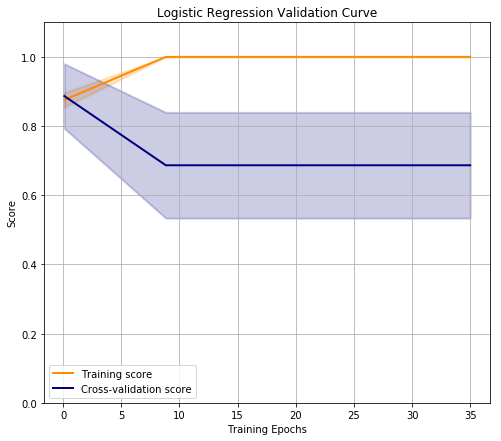

C:\Users\User\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


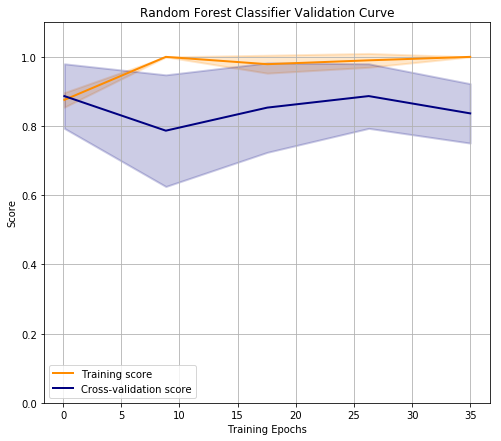

C:\Users\User\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


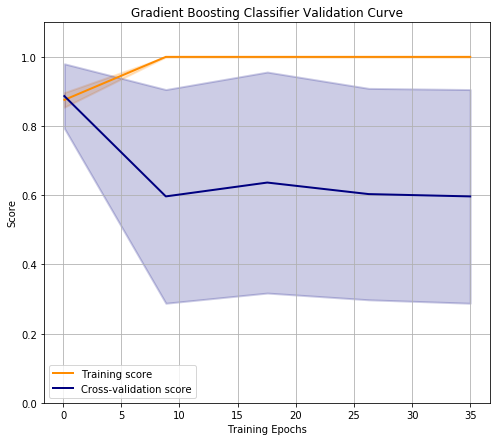

In [60]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, param_name="C",
                          title='', param_range=np.linspace(0.1, 35, 5)):
    plt.figure(figsize=(8, 7))
    plt.title(title)
    plt.xlabel("Training Epochs")
    plt.ylabel("Score")
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("{} Validation Curve".format(title))
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()
    return plt
plot_validation_curve(LogRegr, 'C', 'Logistic Regression')
plt.show()

plot_validation_curve(RandForClass, 'max_depth', 'Random Forest Classifier')
plt.show()

plot_validation_curve(GradBoostClass, 'max_depth', 'Gradient Boosting Classifier')
plt.show()

Сделайте вывод. 

Сделаю функцию, которая будет выводить 100% stacked bar chart, чтобы увидеть тенденции. 

In [30]:
import matplotlib.pylab as plt
import pandas as pd

def get_column(Column=''):
    res = pd.DataFrame()
    
    try:
        if Column:
            res = df[Column]
    finally:
        return res

Вызовите функцию для каждой из ситуаций. 

1) Количество купленных на матч билетов 

2) Дома(1) или в гостях(0)

3) Место команды соперника в турнирной таблице выше середины(0) или ниже(1)

4) Количество проведённых матчей за последнюю неделю

5) Выиграли(1) или проиграли(0) предыдущую игру

6) Положительная(1) или отрицательная(0) статистика игр с этой командой

7) Данную игру выиграли(1) или проиграли (0)

8) Играл(1) или нет(0) игрок Выборочно, наиболее интересные


In [40]:
get_column('Количество купленных на матч билетов')
get_column('Место команды соперника в турнирной таблице выше середины или ниже')
get_column('Количество проведённых матчей за последнюю неделю')
get_column('Выиграли или проиграли предыдущую игру')
get_column('Положительная или отрицательная статистика игр с этой командой')
get_column('Данную игру выиграли или проиграли')
get_column('Играл или нет игрок Трус')
get_column('Коршунов')

Матч
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: Коршунов, dtype: int64

Сделайте вывод для каждого. 

In [ ]:
Все столбцы,кроме:
    'Количество купленных билетов на матч
'Количество проведённых матчей за последнюю неделю'
содержат только нули и единицы.В данном примере мы применили нормализацию данных.

Учитывая незначительные критерии, изменим формулу для создания тестовых и тренировочных сетов, обучим модели заново и сравним с первыми.

In [55]:
Df = pd.read_excel('data.xlsx',index_col=0)
Df = Df.replace('-',0)
Df.columns = feat
for value in [0,1]:
    Df = Df.loc[:, (Df != value).any()] # skip features with zeros or ones only
Df = Df[Df.columns[Df.max() < 2]] # skip integer features
x_test = df.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
Df = Df[:-1] 
RandForClass =  RandomForestClassifier().fit(X, Y)
LogRegr = LogisticRegression().fit(X, Y)
GradBoostClass = GradientBoostingClassifier().fit(X, Y)
GNB = GaussianNB().fit(X, Y)
knc = KNeighborsClassifier().fit(X, Y)
predLogRegr= LogRegr.predict(x_test)
predRandomForClass = RandForClass.predict(x_test)
predGradBoostClass = GradBoostClass.predict(x_test)
predGNB= GNB.predict(x_test)
predknc = knc.predict(x_test)
print("Оценка классификатора случайных: {}%, прогноз: {}".format(RandForClass.score(X, Y) * 100,predRandomForClass[0]))
print("Оценка логистической регрессии: {}%, прогноз: {}".format(LogRegr.score(X,Y) * 100,predLogRegr[0]))
print("Оценка классификатора градиентного повышения: {}%, прогноз: {}".format(GradBoostClass.score(X, Y) * 100,predGradBoostClass[0]))
print("GaussianNB score: {}%, прогноз: {}".format(GNB.score(X, Y) * 100,predGNB[0]))
print("KNeighbors score: {}%, прогноз: {}".format(knc.score(X, Y) * 100,predknc[0]))


Оценка классификатора случайных: 100.0%, прогноз: 1.0
Оценка логистической регрессии: 87.5%, прогноз: 1.0
Оценка классификатора градиентного повышения: 100.0%, прогноз: 1.0
GaussianNB score: 91.66666666666666%, прогноз: 1.0
KNeighbors score: 87.5%, прогноз: 1.0


C:\Users\User\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Вывод.

In [ ]:
Статистика классификаторов осталась без изменений.

Подайте на функцию 25й проверочный тест. Запишите результат. 